In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os, sys
from itertools import repeat

In [2]:
preds = np.load("../models/20230620_vit/preds.npy")
label_ids = np.load("../models/20230620_vit/label_ids.npy")

In [2]:
preds = np.load("../models/20230628_vit_noisy/preds.npy")
label_ids = np.load("../models/20230628_vit_noisy/label_ids.npy")

In [3]:
preds_best, preds_std = preds[:,:, :preds.shape[-1]//2], preds[:,:, preds.shape[-1]//2:]
print(preds.shape, preds_best.shape, preds_std.shape)

(10, 1694, 4) (10, 1694, 2) (10, 1694, 2)


In [4]:
predictions = np.empty((preds_best.shape[0] * 100, preds_best.shape[1], preds_best.shape[2]))
for i in range(preds_best.shape[0]):
    for j in range(100):
        predictions[i*100+j] = np.random.normal(preds_best[i], np.exp(preds_std[i]))

predictions.shape

(1000, 1694, 2)

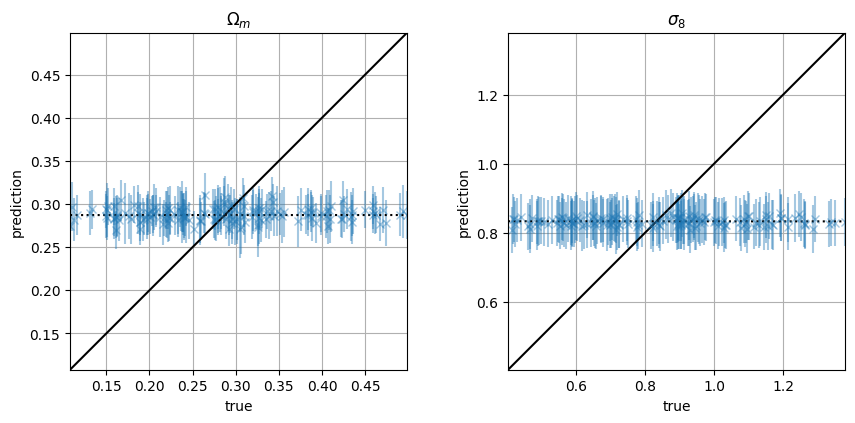

In [5]:
plot_y = label_ids
predictions_best = np.nanmean(predictions, axis=0)
predictions_std = np.nanstd(predictions, axis=0)

upp_lims = np.nanmax(plot_y, axis=0)
low_lims = np.nanmin(plot_y, axis=0)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
labels = [r"$\Omega_m$", r"$\sigma_8$"]
for ind, (label, ax, low_lim, upp_lim) in enumerate(zip(labels, axs.ravel(), low_lims, upp_lims)):
    p = np.poly1d(np.polyfit(plot_y[:, ind], predictions_best[:, ind], 1))
    ax.errorbar(plot_y[:, ind][::10], predictions_best[:, ind][::10],  predictions_std[:, ind][::10], marker="x", ls='none', alpha=0.4)
    # ax.errorbar(plot_y[:, ind][::10], predictions_best[:, ind][::10],  0, marker="x", ls='none', alpha=0.4)
    ax.set_xlabel("true")
    ax.set_ylabel("prediction")
    ax.plot([low_lim, upp_lim], [low_lim, upp_lim], color="black")
    ax.plot([low_lim, upp_lim], [p(low_lim), p(upp_lim)], color="black", ls=":")
    ax.set_xlim([low_lim, upp_lim])
    ax.set_ylim([low_lim, upp_lim])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(label)
    ax.grid()
plt.show()
plt.close()

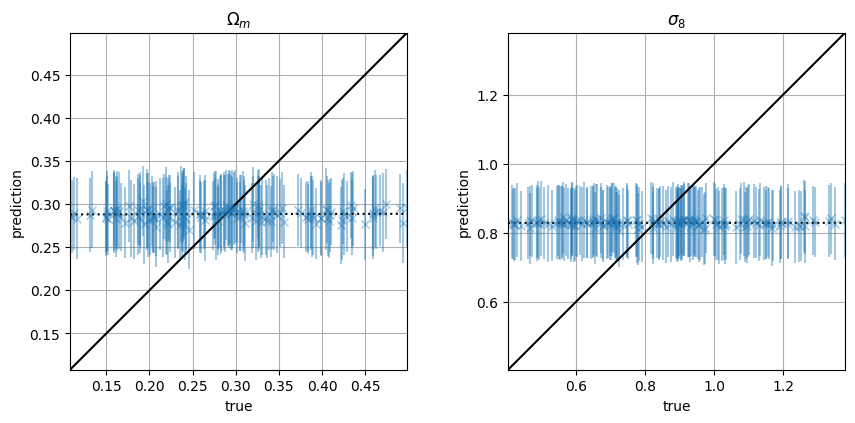

In [6]:
plot_y = label_ids
predictions_best = np.nanmean(predictions, axis=0)
predictions_std = np.nanstd(predictions, axis=0)

upp_lims = np.nanmax(plot_y, axis=0)
low_lims = np.nanmin(plot_y, axis=0)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
labels = [r"$\Omega_m$", r"$\sigma_8$"]
for ind, (label, ax, low_lim, upp_lim) in enumerate(zip(labels, axs.ravel(), low_lims, upp_lims)):
    p = np.poly1d(np.polyfit(plot_y[:, ind], predictions_best[:, ind], 1))
    ax.errorbar(plot_y[:, ind][::10], predictions_best[:, ind][::10],  predictions_std[:, ind][::10], marker="x", ls='none', alpha=0.4)
    # ax.errorbar(plot_y[:, ind][::10], predictions_best[:, ind][::10],  0, marker="x", ls='none', alpha=0.4)
    ax.set_xlabel("true")
    ax.set_ylabel("prediction")
    ax.plot([low_lim, upp_lim], [low_lim, upp_lim], color="black")
    ax.plot([low_lim, upp_lim], [p(low_lim), p(upp_lim)], color="black", ls=":")
    ax.set_xlim([low_lim, upp_lim])
    ax.set_ylim([low_lim, upp_lim])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(label)
    ax.grid()
plt.show()
plt.close()

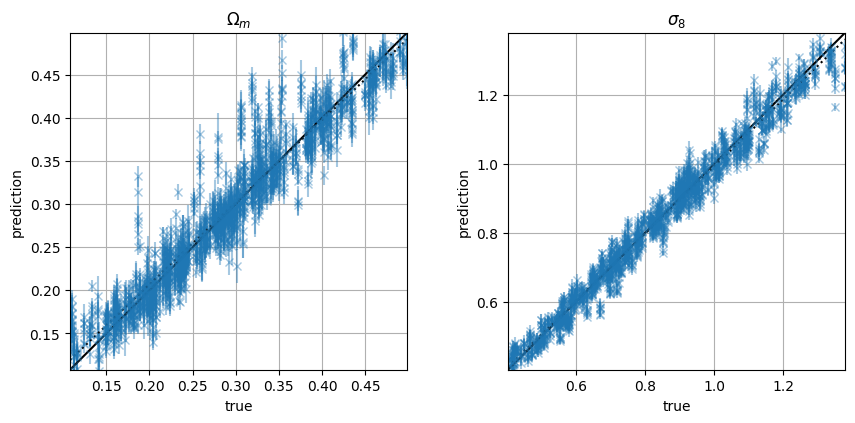

In [6]:
plot_y = label_ids
predictions_best = np.nanmean(predictions, axis=0)
predictions_std = np.nanstd(predictions, axis=0)

upp_lims = np.nanmax(plot_y, axis=0)
low_lims = np.nanmin(plot_y, axis=0)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
labels = [r"$\Omega_m$", r"$\sigma_8$"]
for ind, (label, ax, low_lim, upp_lim) in enumerate(zip(labels, axs.ravel(), low_lims, upp_lims)):
    p = np.poly1d(np.polyfit(plot_y[:, ind], predictions_best[:, ind], 1))
    ax.errorbar(plot_y[:, ind][::10], predictions_best[:, ind][::10],  predictions_std[:, ind][::10], marker="x", ls='none', alpha=0.4)
    # ax.errorbar(plot_y[:, ind][::10], predictions_best[:, ind][::10],  0, marker="x", ls='none', alpha=0.4)
    ax.set_xlabel("true")
    ax.set_ylabel("prediction")
    ax.plot([low_lim, upp_lim], [low_lim, upp_lim], color="black")
    ax.plot([low_lim, upp_lim], [p(low_lim), p(upp_lim)], color="black", ls=":")
    ax.set_xlim([low_lim, upp_lim])
    ax.set_ylim([low_lim, upp_lim])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(label)
    ax.grid()
plt.show()
plt.close()

In [12]:
preds.shape

(3, 16940, 4)

In [6]:
from datasets import load_dataset

noisy = load_dataset("../data/20230419_224x224/20230419_224x224.py", "noisy", cache_dir="/data2/shared/shubh/cache")
noiseless = load_dataset("../data/20230419_224x224/20230419_224x224.py", "noiseless", cache_dir="/data2/shared/shubh/cache")

Found cached dataset 20230419_224x224 (/data2/shared/shubh/cache/20230419_224x224/noisy/1.1.0/757c936113d5e2106df20fda7fda0fc69d503b72ce5ed9de274965efc834c5db)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset 20230419_224x224 (/data2/shared/shubh/cache/20230419_224x224/noiseless/1.1.0/757c936113d5e2106df20fda7fda0fc69d503b72ce5ed9de274965efc834c5db)


  0%|          | 0/3 [00:00<?, ?it/s]

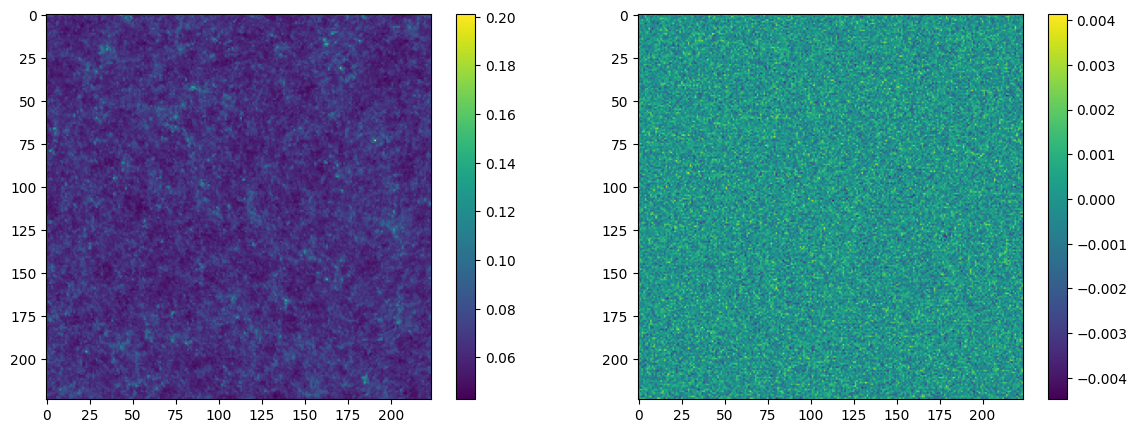

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ind = 3
im = ax1.imshow(np.array(noiseless["train"][0]["map"])[:,:,ind])
fig.colorbar(im, ax=ax1)
im = ax2.imshow(np.array(noisy["train"][0]["map"])[:,:,ind])
fig.colorbar(im, ax=ax2)
plt.show()
plt.close()